In [28]:
import pandas as pd

size=125
params50 = pd.read_excel(f'params/{size}_graph_params.xlsx')
params50.head()

,graph_id,size,no_comms,inside_prob,outside_prob
0,0,125,2,0.4,0.01
1,1,125,2,0.3,0.02
2,2,125,2,0.5,0.05
3,3,125,2,0.4,0.08
4,4,125,2,0.4,0.10


In [29]:
from graph_generating_script import *

asor_list = []
df = pd.DataFrame(columns=['assortativity', 'n_comms'])
for ind, params in params50.iterrows():
    n_vertex = size
    n_comms = int(params['no_comms'])
    inside_prob = params['inside_prob']
    outside_prob = params['outside_prob']

    asor = 0
    for k in range(10):
        (G, _) = generate_G_randomized(n_vertex, n_comms, inside_prob, outside_prob)
        asor += nx.numeric_assortativity_coefficient(G, "community")
    asor_list.append(asor/10)

df['assortativity'] = asor_list
df['n_comms'] = params50['no_comms']
df['graph_id'] = params50['graph_id']

<Axes: xlabel='assortativity', ylabel='Count'>

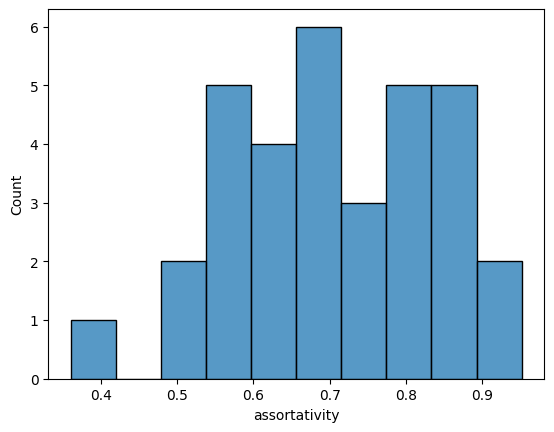

In [30]:
import seaborn as sns
sns.histplot(df['assortativity'], bins=10)

In [31]:
df

,assortativity,n_comms,graph_id
0,0.951503,2,0
1,0.874131,2,1
2,0.810814,2,2
3,0.655268,2,3
4,0.589088,2,4
5,0.741647,2,5
6,0.605665,3,6
7,0.822298,3,7
8,0.711815,3,8
9,0.856824,3,9


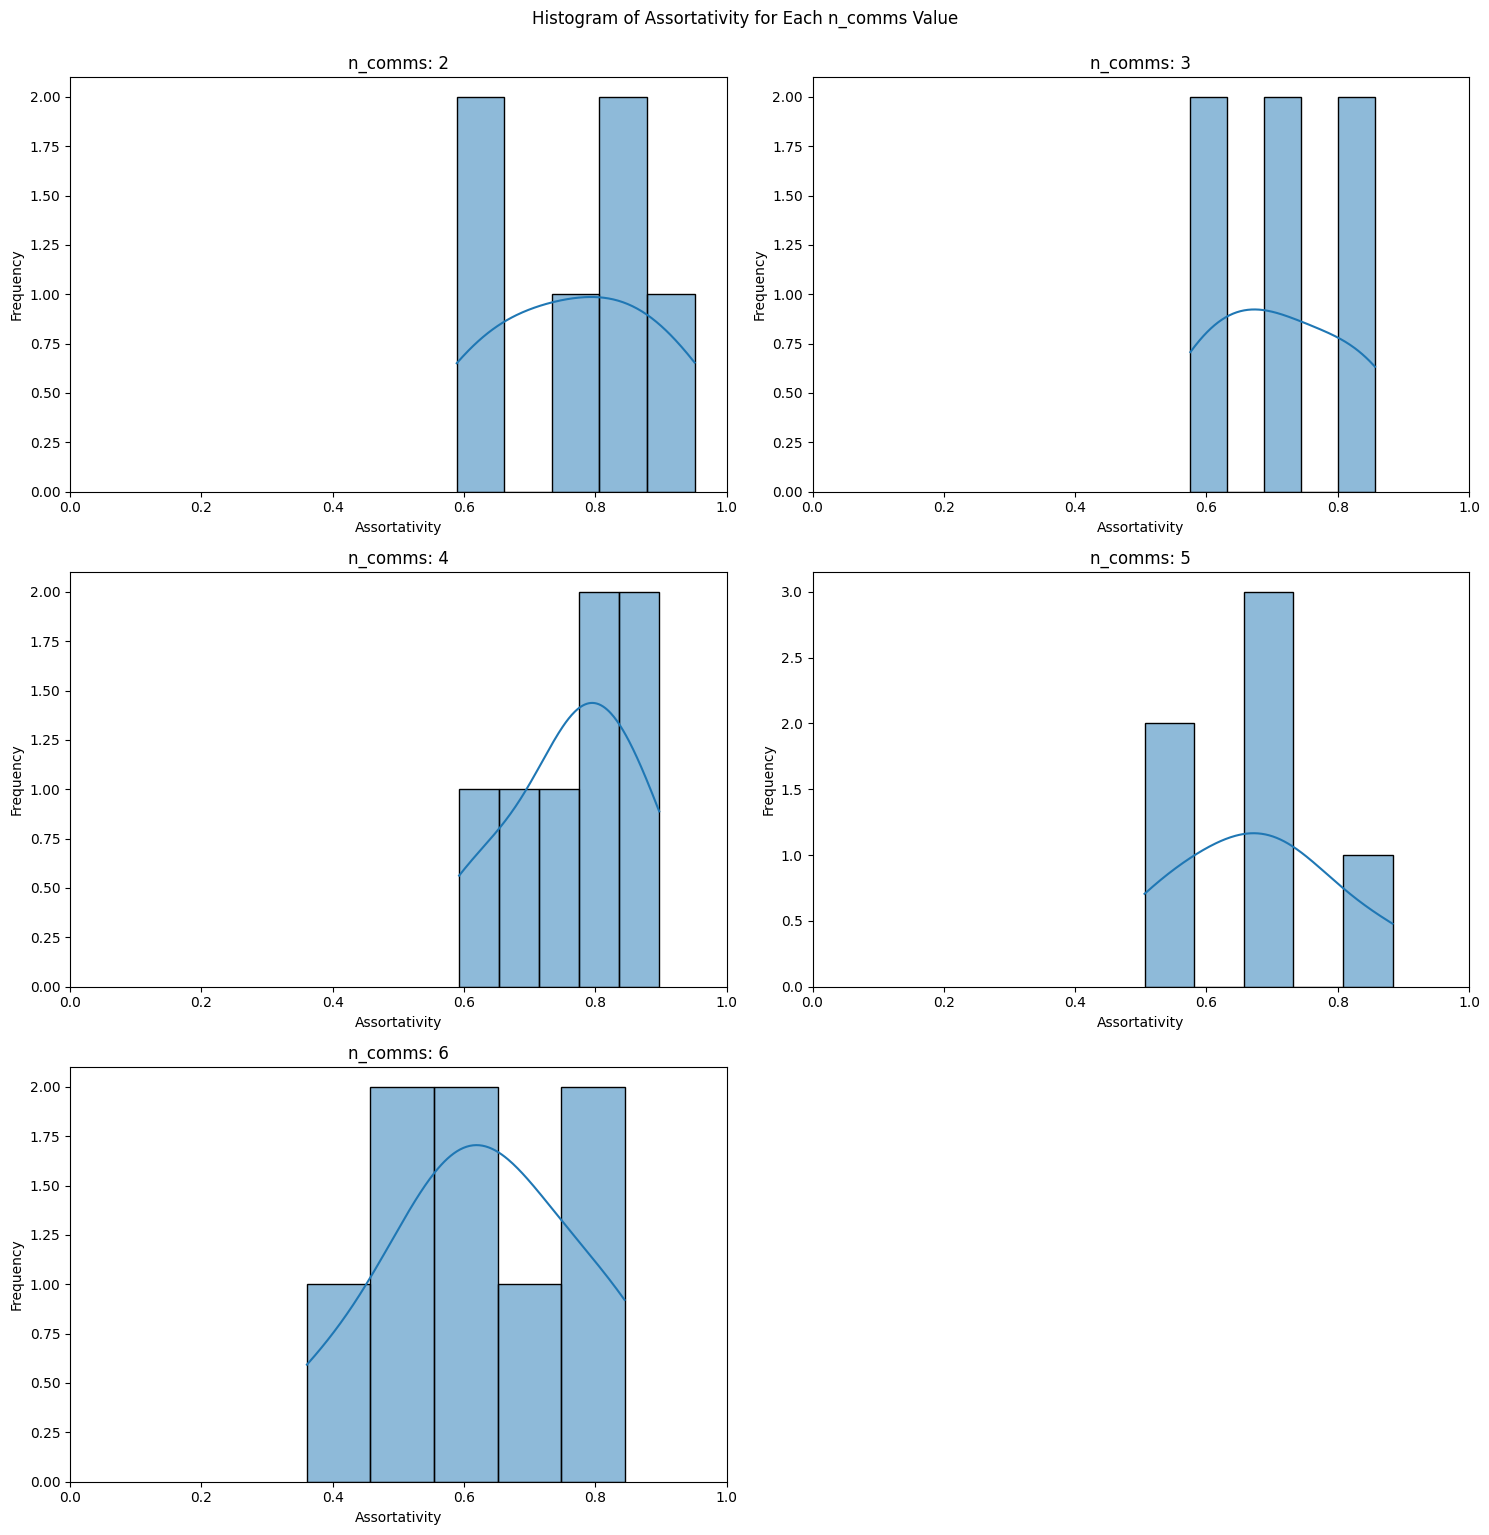

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique values of n_comms
n_comms_values = df['n_comms'].unique()

# Create subplots
num_plots = len(n_comms_values)
fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(15, 5 * ((num_plots + 1) // 2)))

axes = axes.flatten()

# Plot each n_comms value in a separate subplot
for ax, n_comms in zip(axes, n_comms_values):
    subset = df[df['n_comms'] == n_comms]
    sns.histplot(subset['assortativity'], ax=ax, kde=True, bins=5)
    ax.set_title(f'n_comms: {n_comms}')
    ax.set_xlabel('Assortativity')
    ax.set_ylabel('Frequency')
    ax.set_xlim(0, 1)  # Set x-axis range between 0 and 1

# Remove any empty subplots
for i in range(len(n_comms_values), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.suptitle('Histogram of Assortativity for Each n_comms Value', y=1.02)
plt.show()

# Analysing distribution for all joined params

In [34]:
import pandas as pd
import os
import glob


directory = 'params'
excel_files = glob.glob(os.path.join(directory, '*.xlsx'))
dfs = [pd.read_excel(file) for file in excel_files]
combined_params = pd.concat(dfs, ignore_index=True)
print(combined_params)

     graph_id  size  no_comms  inside_prob  outside_prob
0           0   100         2         0.40          0.01
1           1   100         2         0.30          0.02
2           2   100         2         0.50          0.05
3           3   100         2         0.45          0.08
4           4   100         2         0.40          0.10
..        ...   ...       ...          ...           ...
189        28    75         6         0.40          0.05
190        29    75         6         0.40          0.03
191        30    75         6         0.80          0.06
192        31    75         6         0.65          0.08
193        32    75         6         0.60          0.05

[194 rows x 5 columns]


In [35]:
from graph_generating_script import *

asor_list = []
df = pd.DataFrame(columns=['assortativity', 'n_comms'])
for ind, params in combined_params.iterrows():
    n_vertex = combined_params['size'][0]
    n_comms = int(params['no_comms'])
    inside_prob = params['inside_prob']
    outside_prob = params['outside_prob']

    asor = 0
    for k in range(10):
        (G, _) = generate_G_randomized(n_vertex, n_comms, inside_prob, outside_prob)
        asor += nx.numeric_assortativity_coefficient(G, "community")
    asor_list.append(asor/10)

df['assortativity'] = asor_list
df['n_comms'] = combined_params['no_comms']

In [ ]:
df.tail()

,assortativity,n_comms
189,0.509957,6
190,0.644281,6
191,0.645847,6
192,0.527978,6
193,0.623783,6


<Axes: xlabel='assortativity', ylabel='Count'>

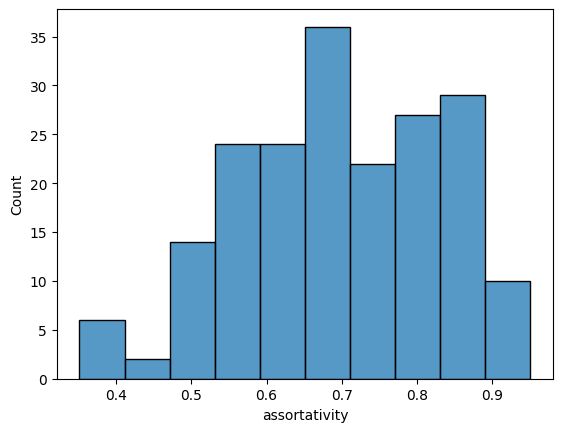

In [37]:
import seaborn as sns
sns.histplot(df['assortativity'], bins=10)

In [ ]:
import seaborn as sns
subset = df[df['size'] == 150]
sns.histplot(subset['assortativity'])

KeyError: 'size'